<a href="https://colab.research.google.com/github/TD91988/LinearRegression/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

real estate dataset

In [0]:
data = pd.read_csv("Real estate valuation data set.csv")

In [0]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [0]:
data = data.drop('No', axis=1)
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


plt.figure(figsize=(5,5))
plt.title('How many have diabetes(0=No,1=Yes)')
locs, labels = plt.xticks()
sns.countplot(data['distance to the nearest MRT station']);
data['charges'].value_counts();

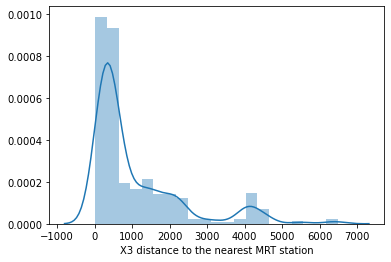

In [0]:
sns.distplot(data['X3 distance to the nearest MRT station'].dropna(),kde=True)

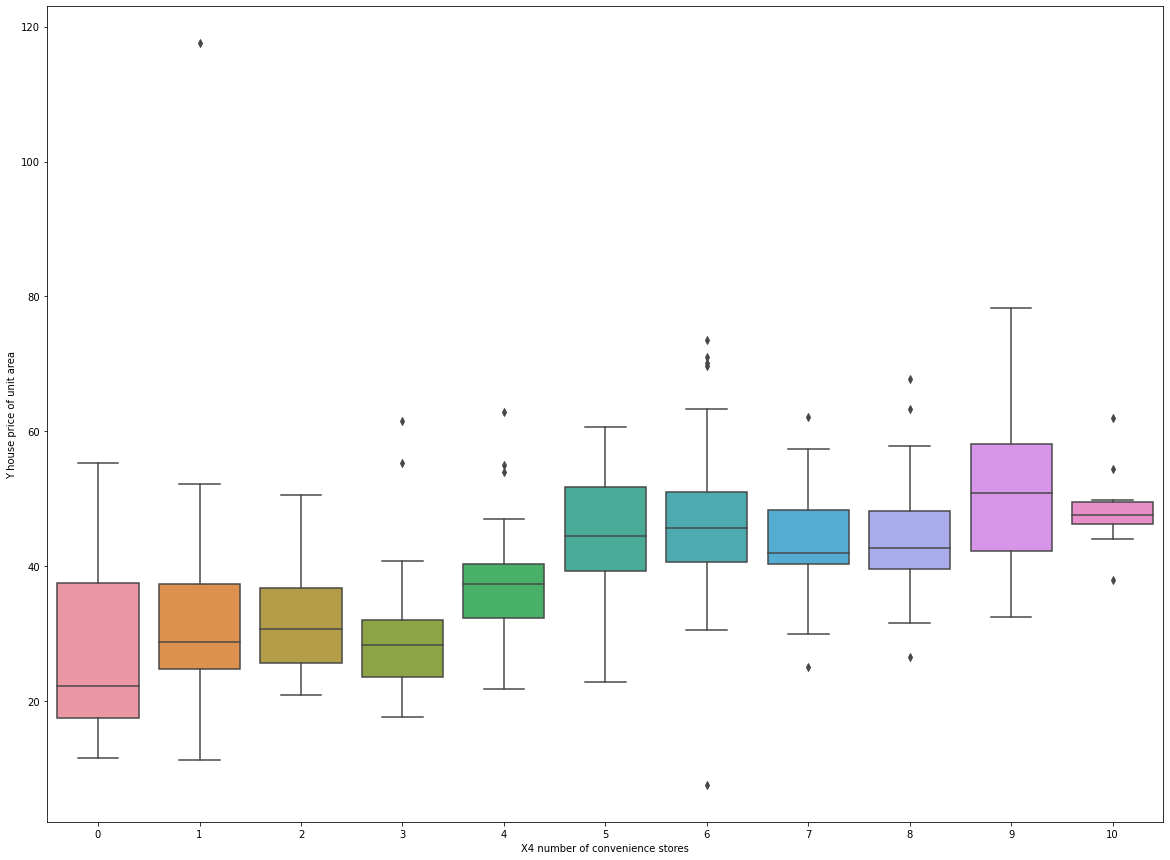

In [0]:
plt.subplots(figsize=(20,15))
sns.boxplot(x='X4 number of convenience stores', y='Y house price of unit area', data=data)

In [0]:
#X4 number of convenience stores
x = data[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores',
         'X5 latitude','X6 longitude']].values
y = data['Y house price of unit area'].values

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [0]:
model = LinearRegression()
model.fit(xTrain, yTrain)

LinearRegression()

In [0]:
yPred = model.predict(xTest)
print(yPred)

[40.09548022 12.83819172 42.00966923 12.64733002 42.44343803 39.83198984
 40.55595745 33.86023762 49.37328265 45.87031976 45.86310332 40.64517161
 39.50676203 40.04955455 47.11860745 38.13995857 40.08417262 41.12540438
 40.83964717 42.37860913 49.70003677 31.08231285 39.67622569 45.52764709
 46.18872415 43.43143246 46.35880414 26.20749681 48.13688227 21.53997799
 44.8104349  34.94131598 42.6644548  38.37379621 43.98018394 32.28477958
 47.62406077 39.77407301 52.55712201  7.46443039 52.54110472 33.1285138
 34.22107416 49.59242876 15.37567885 43.36042455 42.40643117 12.9983919
 33.99155573 48.50179814 53.67150141 38.73047082 47.73879852 25.42163729
 30.68691477 34.27187582 48.91161249 40.61983209 43.45816985 32.95307348
 43.85237072 43.62659423 39.55165632 47.0209757  36.84017788 30.00963218
  9.66438363 34.92190591 46.16892784 39.83198984 31.0777362  46.14863976
 44.93807805 30.68551351 40.64359986 36.24180038 31.13625745 13.07226688
 47.12551189 44.71774583 46.8446933  29.11676154 43.2

In [0]:
from sklearn import metrics
print('Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yTest,yPred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMS 7.7150784389420926
